## Black Friday Dataset EDA and Feature Engineering

## Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [1]:
## Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## importing train dataset
df_train=pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
## import test dataset
df_test = pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
## merge both datset
df=pd.concat([df_train,df_test],axis=0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [5]:
## Basic info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
## drop User Id columns because it has no use 
df.drop(['User_ID'],axis=1,inplace=True)

In [9]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [10]:
## handling categorical feature Gender
df['Gender']=df['Gender'].map({'F':1, 'M':0})


In [11]:
df.head()
## Convert F to 1 and M to 0 in Gender feature

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [12]:
## handling categorical feature Gender

In [13]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [14]:
df['Age'].value_counts()

Age
26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: count, dtype: int64

In [15]:
### Use Label Encoding 
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
df['Age']=label_encoder.fit_transform(df['Age'])


In [16]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,6,16,C,4+,0,8,NaN,NaN,7969.0


In [17]:
##fixing categorical City_categort
df_city=pd.get_dummies(df['City_Category'],drop_first=True,dtype=int)

In [18]:
df_city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


In [19]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [20]:
df=pd.concat([df,df_city],axis=1)

In [21]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,0,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,1,0,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,0,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,1,0,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,0,6,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [23]:
## drop city_category feature
df.drop('City_Category',axis=1,inplace=True)

In [24]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,0,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,1,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,0,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,1,0,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,0,6,16,4+,0,8,NaN,NaN,7969.0,0,1


In [28]:
## Missing Values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

## Observation
There is many missing values in Product_cate1 and Product_cat 2


In [31]:
## Handling Missing vlues


In [32]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [33]:
df['Product_Category_1'].value_counts()

Product_Category_1
5     215950
1     200699
8     162294
11     34440
2      34056
6      29326
3      28791
4      16756
16     13933
15      8984
13      7930
10      7373
12      5610
7       5345
18      4436
20      2550
14      2186
19      1603
17       801
9        604
Name: count, dtype: int64

In [34]:
## Replace missing value with mode in Product_Category_1


In [41]:
df['Product_Category_1'].mode()[0]

np.int64(5)

In [42]:
df['Product_Category_1']=df['Product_Category_1'].fillna(df['Product_Category_1'].mode()[0])

In [43]:
df['Product_Category_1'].isnull().sum()

np.int64(0)

In [44]:
## clearly see tha nomissing value in Product_Category_1

In [45]:
## Replace missing values with mode in Product_Category_2

In [47]:
df['Product_Category_2'].mode()[0]

np.float64(8.0)

In [48]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [49]:
df['Product_Category_2'].isnull().sum()

np.int64(0)

In [50]:
## Clearly see that no missing values in Product_Category_2

In [51]:
df.shape

(783667, 12)

In [52]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [53]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [54]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 77.7+ MB


In [57]:
##change dtype of Stay_In_Current_City_Years into int

In [58]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 77.7+ MB


In [61]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 77.7+ MB


In [63]:
df.describe()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
count,783667.00000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,237858.000000,550068.000000,783667.000000,783667.000000
mean,0.24709,2.496802,8.079300,1.858247,0.409777,5.366196,9.265541,12.668605,9263.968713,0.420764,0.310954
std,0.43132,1.352736,6.522206,1.288790,0.491793,3.878160,4.301427,4.125510,5023.065394,0.493682,0.462884
min,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,0.000000,0.000000
25%,0.00000,2.000000,2.000000,1.000000,0.000000,1.000000,8.000000,9.000000,5823.000000,0.000000,0.000000
50%,0.00000,2.000000,7.000000,2.000000,0.000000,5.000000,8.000000,14.000000,8047.000000,0.000000,0.000000
75%,0.00000,3.000000,14.000000,3.000000,1.000000,8.000000,14.000000,16.000000,12054.000000,1.000000,1.000000
max,1.00000,6.000000,20.000000,4.000000,1.000000,20.000000,18.000000,18.000000,23961.000000,1.000000,1.000000


In [69]:
## visulaization


<Axes: xlabel='Age', ylabel='Purchase'>

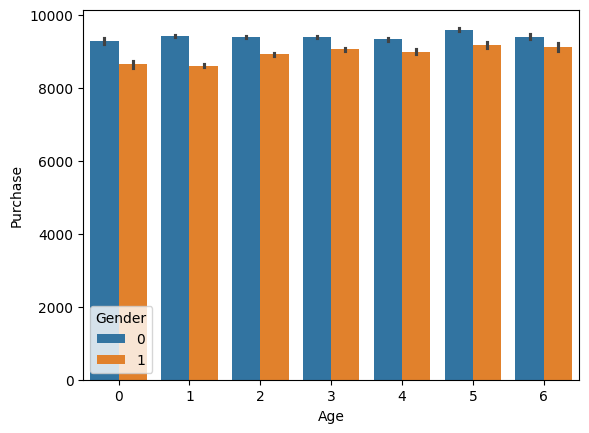

In [70]:
## visulaization of age and purchase
sns.barplot(data=df,x='Age', y='Purchase',hue='Gender')


## Observation
Purchasing of men higher than women in every caterogry of Age

In [71]:
## Visulization of purchase with occupaction


<Axes: xlabel='Occupation', ylabel='Purchase'>

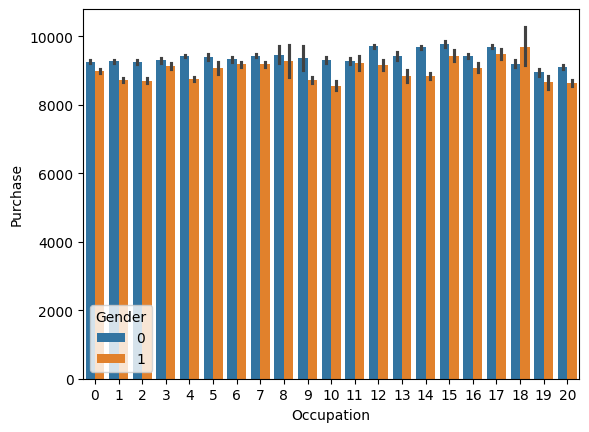

In [73]:

sns.barplot(data=df,x='Occupation', y='Purchase',hue='Gender')

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

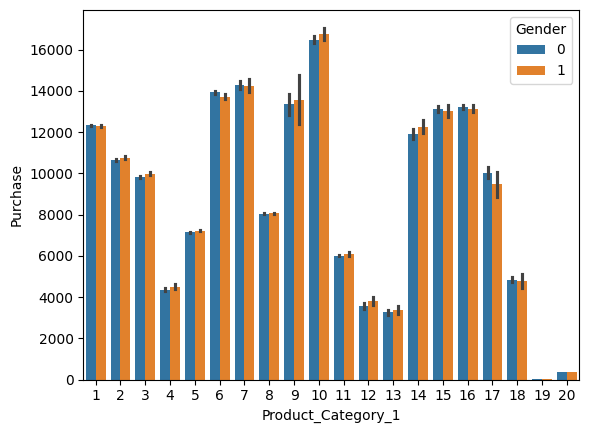

In [74]:
## visualization of Product_cate=gory1 
sns.barplot(data=df,x='Product_Category_1', y='Purchase',hue='Gender')

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

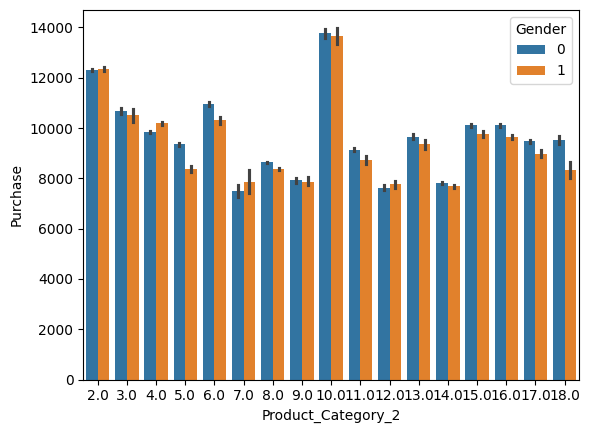

In [75]:
## visualization of Product_cate=gory2 
sns.barplot(data=df,x='Product_Category_2', y='Purchase',hue='Gender')